In [1]:
import os
import sys

from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_excel("../daily_tracking.xlsx", sheet_name='weight', header=1)

In [3]:
data.head()

,Date,Weeks,avg,std,Thu,Fri,Sat,Sun,Mon,Tue,Wed,Change Reason
0,2019-01-10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-24,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-31,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-07,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Date', 'Weeks', 'avg', 'std', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue',
       'Wed', 'Change Reason'],
      dtype='object')

In [5]:
# weight curve frequency -- daily/weekly/monthy
freq = 1

In [6]:
date_cols = ['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed']
date_maps = {c: i for i, c in enumerate(date_cols)}

In [7]:
new_data = data[['Date'] + date_cols].rename(columns=date_maps)
new_data.columns

Index(['Date', 0, 1, 2, 3, 4, 5, 6], dtype='object')

In [8]:
# transpose data
new_data_l = new_data.melt(id_vars='Date', value_vars=date_maps.values(), 
              value_name='weight', var_name='prenatal_weekday')

In [9]:
new_data_l = new_data_l.sort_values(by = ['Date', 'prenatal_weekday'], 
                       ascending=[True, True])
new_data_l['calendar_date'] = new_data_l[['Date', 'prenatal_weekday']].apply(
    lambda x: x[0] + timedelta(x[1]), axis=1)
new_data_l = new_data_l.rename(columns={'Date': 'prenatal_week_s'})

In [10]:
new_data_l['calendar_weekday'] = new_data_l['calendar_date'].dt.dayofweek

In [11]:
new_data_l.index = new_data_l['calendar_date']
# new_data_l.drop('calendar_date', axis=1, inplace=True)
new_data_l.head()

,prenatal_week_s,prenatal_weekday,weight,calendar_date,calendar_weekday
calendar_date,,,,,
2019-01-10,2019-01-10,0,NaN,2019-01-10,3
2019-01-11,2019-01-10,1,NaN,2019-01-11,4
2019-01-12,2019-01-10,2,NaN,2019-01-12,5
2019-01-13,2019-01-10,3,NaN,2019-01-13,6
2019-01-14,2019-01-10,4,NaN,2019-01-14,0


In [12]:
new_data_l['prenatal_week_no'] = new_data_l.groupby(['prenatal_week_s']).ngroup()
# new_data_l['prenatal_months']
new_data_l.max()

prenatal_week_s     2019-10-17 00:00:00
prenatal_weekday                      6
weight                             59.7
calendar_date       2019-10-23 00:00:00
calendar_weekday                      6
prenatal_week_no                     40
dtype: object

#### matplotlib flavor

In [13]:
# sns.set(style="white")
new_data_l.loc['2019-07-24']

prenatal_week_s     2019-07-18 00:00:00
prenatal_weekday                      6
weight                             56.7
calendar_date       2019-07-24 00:00:00
calendar_weekday                      2
prenatal_week_no                     27
Name: 2019-07-24 00:00:00, dtype: object

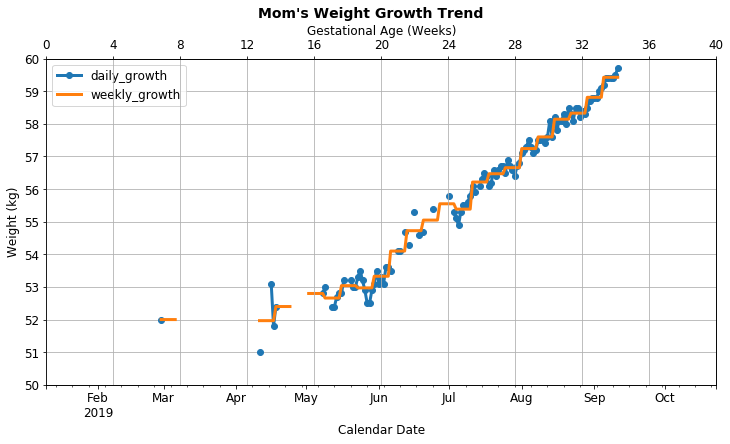

In [14]:
# daily growth
new_data_l['weight'].plot(kind='line',
                          figsize=(12, 6),
                          ylim=[50, 60], 
                          xlim=[new_data_l.index[0], new_data_l.index[-1]],
                          fontsize=12,
                          yticks=range(50, 61, 1),
                          xticks=pd.date_range(start='2019-1-10', end='2019-10-17', freq='7D'),
                          label='daily_growth',
                          linewidth=3,
                          marker='o',
                          )
ax = plt.gca()
# weekly growth by mean value
new_data_l['weekly_mean'] = new_data_l.groupby(
    'prenatal_week_s')['weight'].transform(np.mean)
new_data_l['weekly_mean'].plot(kind='line',
                              figsize=(12, 6),
                              ylim=[50, 60], 
                              xlim=[new_data_l.index[0], new_data_l.index[-1]],
                              fontsize=12,
                              yticks=range(50, 61, 1),
                              label='weekly_growth',
                              linewidth=3,
#                               marker='x',
                              ax=ax
                          )
# overall settings
ax.legend(fontsize=12)
ax.set_xlabel('Calendar Date', fontsize=12)
ax.set_ylabel('Weight (kg)', fontsize=12)
# ax.grid()
ax.yaxis.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(range(0, new_data_l['prenatal_week_no'].max() + 4, 4))
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel('Gestational Age (Weeks)', fontsize=12)
ax2.xaxis.grid(True)


fig = plt.gcf()
fig.suptitle("Mom's Weight Growth Trend", 
             x=0.5, y=1, fontsize=14, fontweight='bold')
# fig.subplots_adjust(top=0.85)
fig.savefig("mom_weight_growth.png")

plt.show()

#### seaborn flavor

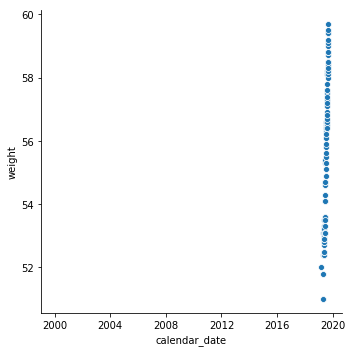

In [15]:
sns.relplot(x="calendar_date", y="weight", kind="scatter", data=new_data_l)